In [1]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pickle
from scipy import optimize
import seaborn as sns
from matplotlib.colors import LogNorm
import itertools
palette=sns.color_palette()

fparams =  {'xtick.labelsize': 22,
            'ytick.labelsize': 22,
            'axes.labelsize': 26,
            'axes.titlesize': 22,
            'font.size': 22,
            'legend.fontsize': 20,
            'text.usetex': True,
            'legend.frameon' : False,
            'svg.fonttype': 'path',
            'lines.linewidth': 2.5,
             
            'lines.markersize': 10}

plt.rcParams.update(fparams)

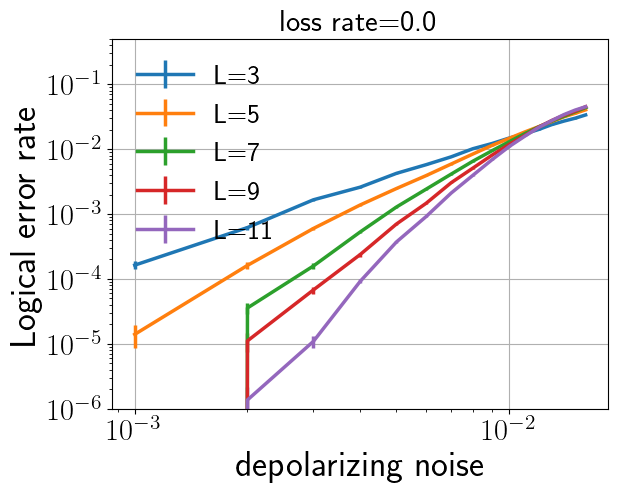

In [2]:
#Logical error rate at a fixed loss rate

Ls = range(3,13,2)#list of distances to plot
loss=0.0#loss probability

log_errors_all= []
depo_all=[]
num_shots_all=[]

#load the results
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_X_basis_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        

#plot the results
plt.figure()
for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    
    #compute the logical error per round and the associate derror bar
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
    plt.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
plt.xlabel("depolarizing noise")
plt.ylabel("Logical error rate")
plt.title('loss rate={}'.format(loss))
plt.grid()
plt.yscale("log")
plt.xscale('log')
#plt.xlim(0.003,0.007)
plt.ylim(10**(-6),0.5)
plt.legend(loc=0);

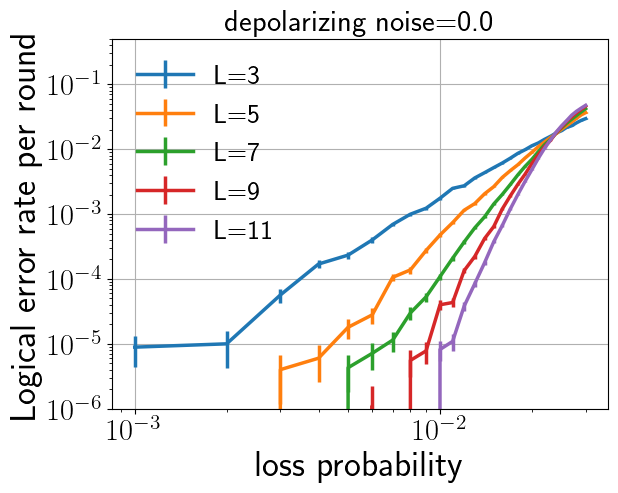

In [3]:
#Logical error rate at a fixed depolarizing noise probability


Ls = range(3,13,2)#list of distances to plot
depo=0.0 #depolarizing noise probability

log_errors_all= []
loss_rate_all=[]
num_shots_all=[]


#load the results
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_X_basis_standard_LDU_d=({},{})_rounds={}_depo_noise={}.pkl'.format(L,L,L,depo), 'rb') as fp:
        data_saved=pickle.load(fp)
    loss_rate=sorted(list(data_saved.keys()))
    for p in loss_rate:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    loss_rate_all.append(loss_rate)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        

#plot the results
plt.figure()
for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,loss_rate_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
    
    plt.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
plt.xlabel("loss probability")
plt.ylabel("Logical error rate per round")
plt.title('depolarizing noise={}'.format(depo))
plt.grid()
plt.yscale("log")
plt.xscale('log')
plt.ylim(10**(-6),0.5)
plt.legend(loc=0);

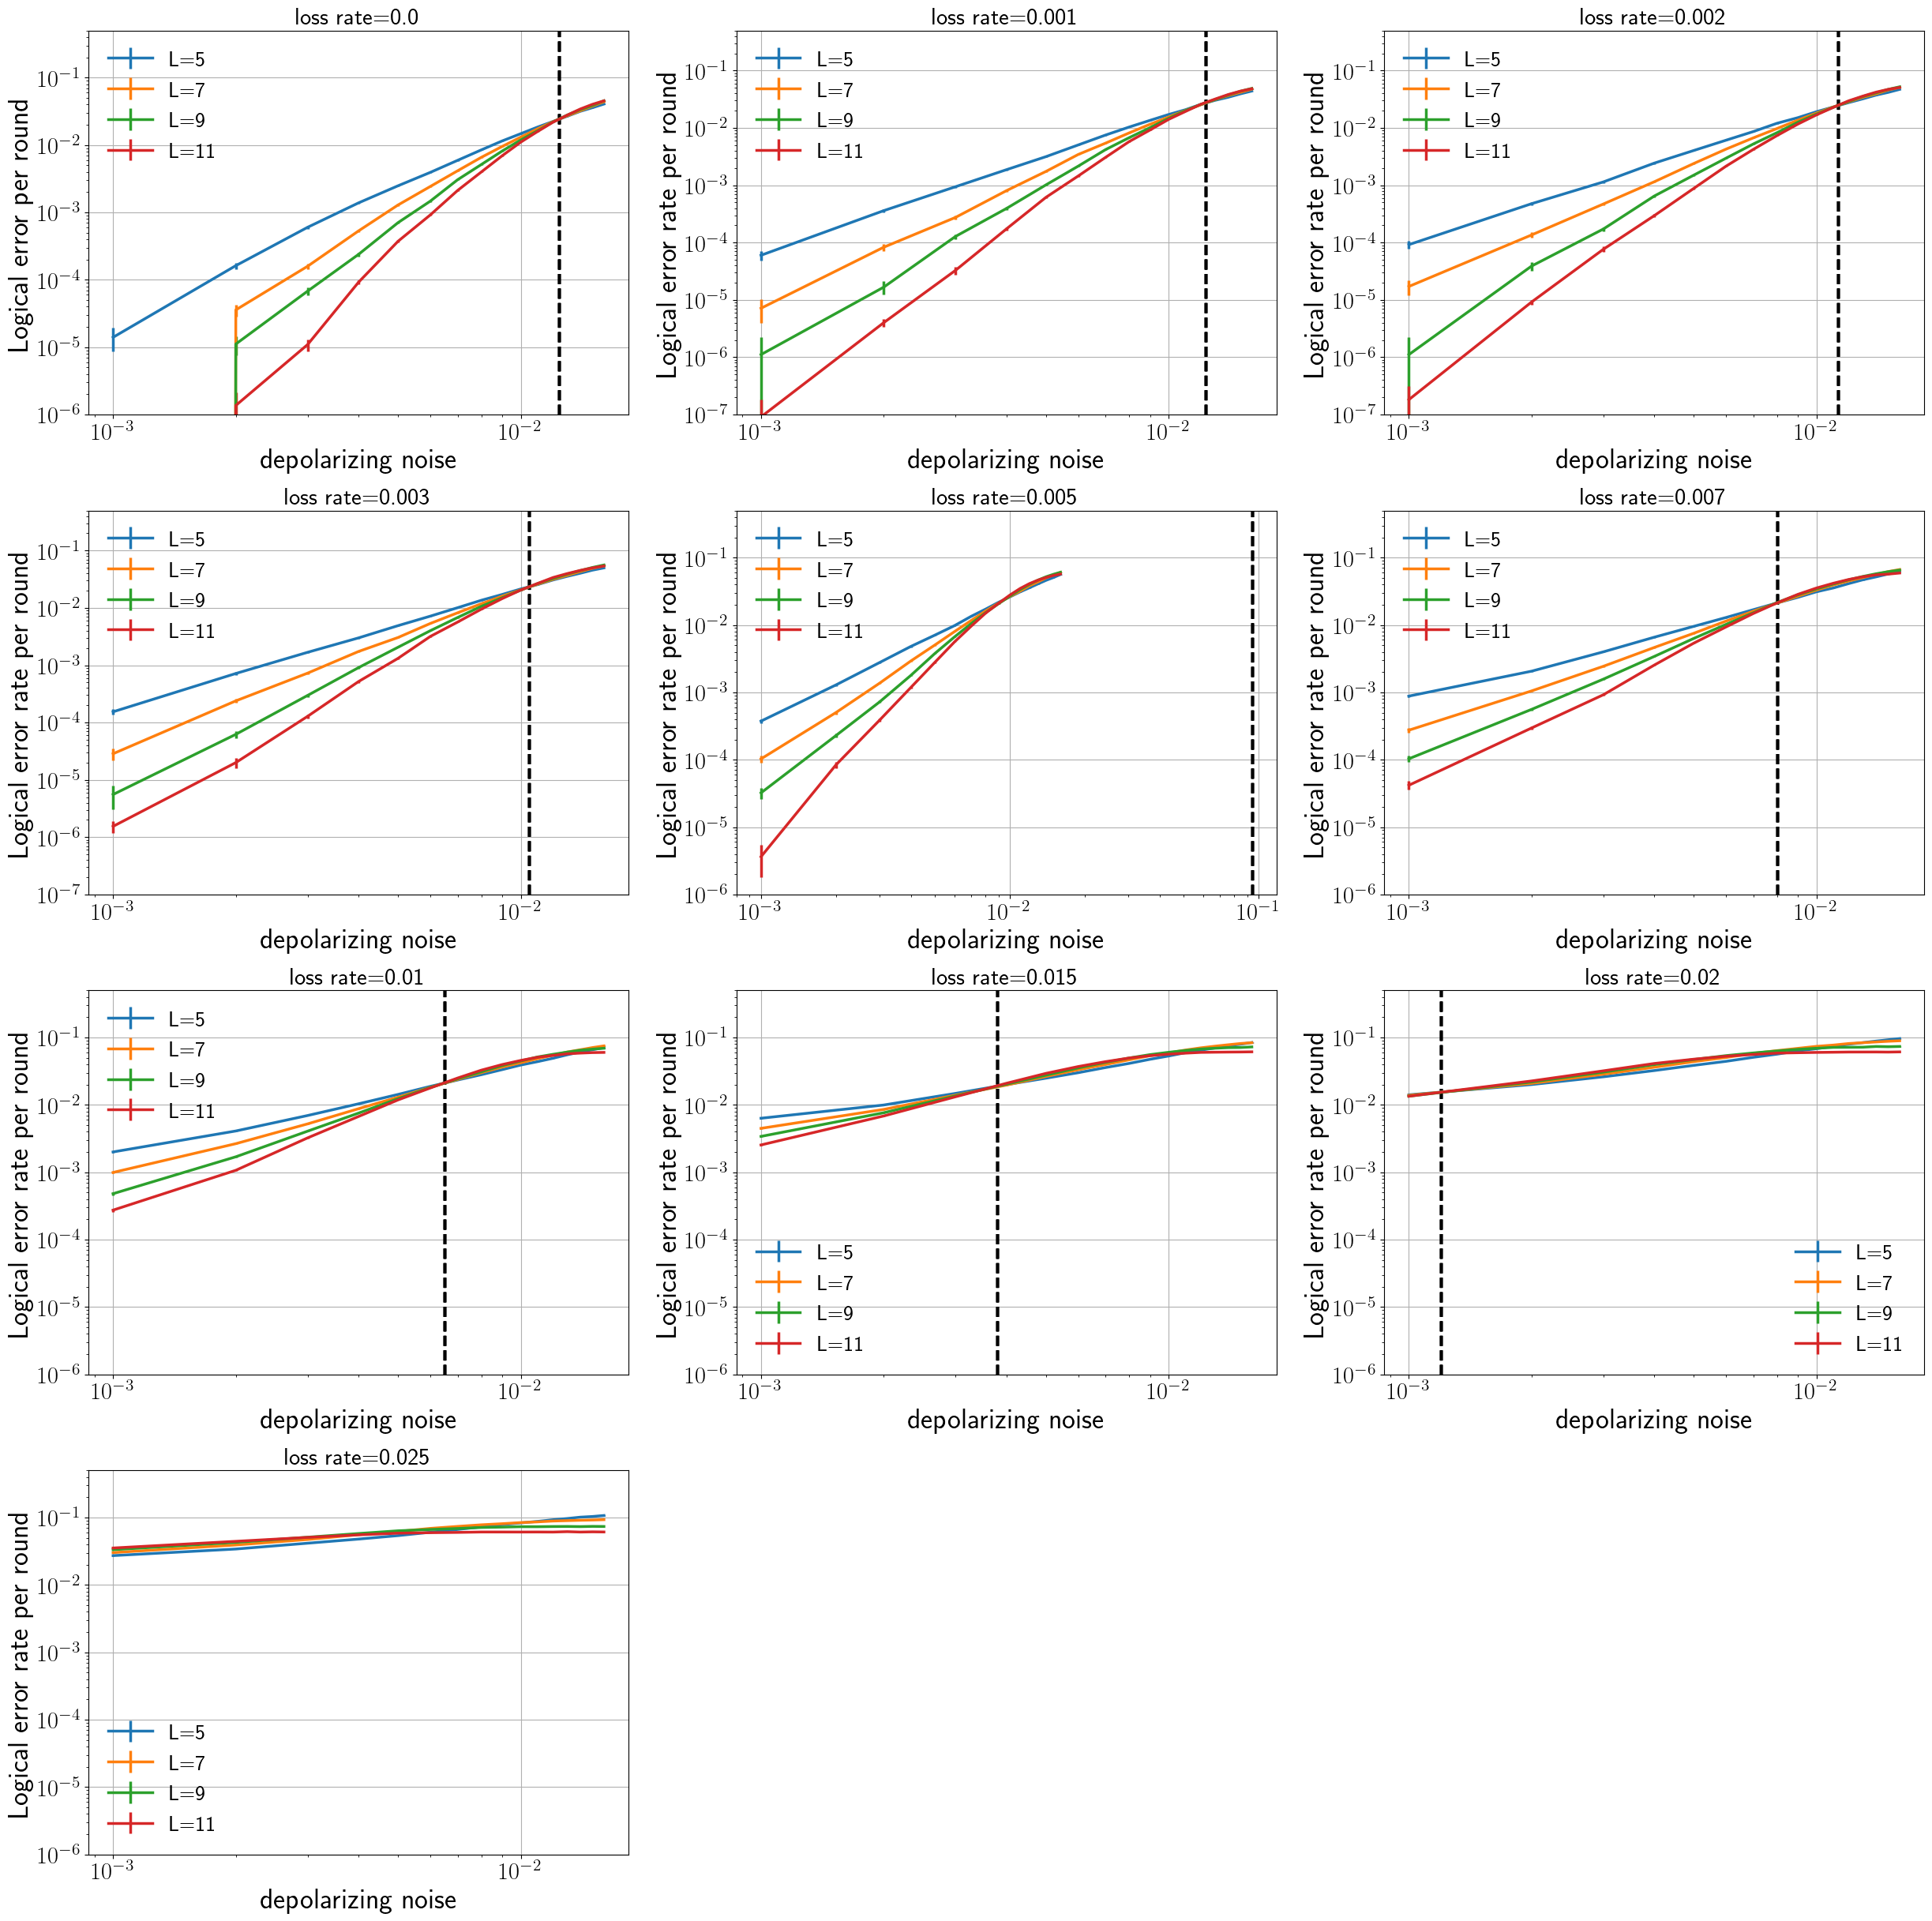

In [4]:
#logical error at various loss proabilities

from matplotlib.markers import MarkerStyle
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset




fig = plt.figure(figsize=(30, 30))
table = gridspec.GridSpec(ncols=3, nrows=4)


ax1 = fig.add_subplot(table[0, 0])

ax2 = fig.add_subplot(table[0, 1])

ax3 = fig.add_subplot(table[0, 2])

ax4 = fig.add_subplot(table[1, 0])

ax5 = fig.add_subplot(table[1, 1])

ax6 = fig.add_subplot(table[1, 2])

ax7 = fig.add_subplot(table[2, 0])

ax8 = fig.add_subplot(table[2, 1])

ax9 = fig.add_subplot(table[2, 2])

ax10 = fig.add_subplot(table[3, 0])





Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.00
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_X_basis_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    

for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    ax1.axvline(x=0.0124,linestyle='--',color='black')
   
    
    ax1.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))

ax1.set_xlabel("depolarizing noise")
ax1.set_ylabel("Logical error  per round")
ax1.set_title('loss rate={}'.format(loss))
ax1.grid()
ax1.set_yscale("log")
ax1.set_xscale('log')
ax1.set_ylim(10**(-6),0.5)
ax1.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.001
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_X_basis_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    ax2.axvline(x=0.0123,linestyle='--',color='black')
    
    ax2.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax2.set_xlabel("depolarizing noise")
ax2.set_ylabel("Logical error rate per round")
ax2.set_title('loss rate={}'.format(loss))
ax2.grid()
ax2.set_yscale("log")
ax2.set_xscale('log')
ax2.set_ylim(10**(-7),0.5)
ax2.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.002
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_X_basis_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
   
    ax3.axvline(x=0.0113,linestyle='--',color='black')
   
    ax3.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax3.set_xlabel("depolarizing noise")
ax3.set_ylabel("Logical error rate per round")
ax3.set_title('loss rate={}'.format(loss))
ax3.grid()
ax3.set_yscale("log")
ax3.set_xscale('log')
ax3.set_ylim(10**(-7),0.5)
ax3.legend(loc=0);


Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.003
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_X_basis_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
   
    ax4.axvline(x=0.0105,linestyle='--',color='black')
   
    ax4.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax4.set_xlabel("depolarizing noise")
ax4.set_ylabel("Logical error rate per round")
ax4.set_title('loss rate={}'.format(loss))
ax4.grid()
ax4.set_yscale("log")
ax4.set_xscale('log')
ax4.set_ylim(10**(-7),0.5)
ax4.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.005
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_X_basis_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
   
    ax5.axvline(x=0.094,linestyle='--',color='black')
   
    ax5.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax5.set_xlabel("depolarizing noise")
ax5.set_ylabel("Logical error rate per round")
ax5.set_title('loss rate={}'.format(loss))
ax5.grid()
ax5.set_yscale("log")
ax5.set_xscale('log')
ax5.set_ylim(10**(-6),0.5)
ax5.legend(loc=0);


Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.007
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_X_basis_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
   
    ax6.axvline(x=0.008,linestyle='--',color='black')
   
    ax6.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax6.set_xlabel("depolarizing noise")
ax6.set_ylabel("Logical error rate per round")
ax6.set_title('loss rate={}'.format(loss))
ax6.grid()
ax6.set_yscale("log")
ax6.set_xscale('log')
ax6.set_ylim(10**(-6),0.5)
ax6.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.01
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_X_basis_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        


for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    ax7.axvline(x=0.0065,linestyle='--',color='black')
   
    ax7.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax7.set_xlabel("depolarizing noise")
ax7.set_ylabel("Logical error rate per round")
ax7.set_title('loss rate={}'.format(loss))
ax7.grid()
ax7.set_yscale("log")
ax7.set_xscale('log')
ax7.set_ylim(10**(-6),0.5)
ax7.legend(loc=0);


Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.015
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_X_basis_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        


for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    ax8.axvline(x=0.0038,linestyle='--',color='black')
   
    ax8.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax8.set_xlabel("depolarizing noise")
ax8.set_ylabel("Logical error rate per round")
ax8.set_title('loss rate={}'.format(loss))
ax8.grid()
ax8.set_yscale("log")
ax8.set_xscale('log')
ax8.set_ylim(10**(-6),0.5)
ax8.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.02
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_X_basis_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    ax9.axvline(x=0.0012,linestyle='--',color='black')
   
    ax9.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax9.set_xlabel("depolarizing noise")
ax9.set_ylabel("Logical error rate per round")
ax9.set_title('loss rate={}'.format(loss))
ax9.grid()
ax9.set_yscale("log")
ax9.set_xscale('log')
ax9.set_ylim(10**(-6),0.5)
ax9.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.025
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_X_basis_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    
    ax10.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax10.set_xlabel("depolarizing noise")
ax10.set_ylabel("Logical error rate per round")
ax10.set_title('loss rate={}'.format(loss))
ax10.grid()
ax10.set_yscale("log")
ax10.set_xscale('log')
ax10.set_ylim(10**(-6),0.5)
ax10.legend(loc=0);




table.update(hspace=0.25)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import itertools
import pickle



plt.rcParams.update(fparams3)

threshold_depo=[0.0123,0.0113,0.0105,0.0094,0.008,0.0065,0.0038,0.002,0.0012,0.001]
threshold_loss=[0.001,0.002,0.003,0.005,0.007,0.01,0.015,0.0188,0.02,0.0208]
# Create a grid of x and y values

depo_max=0.016
L = 11
log_errors_all= []
loss_rate = [0.0,0.001,0.002,0.003,0.005,0.007,0.01,0.015,0.02,0.025]
depo_all = []
depo_all = []

loss_rate_all = []
std_err_all = []
for loss in loss_rate:
    log_errors=[]
    depo2=[]
    depo2.append(0)
    if loss==0.0:
        log_errors.append(0)
    else:
        with open('data/logical_error_X_basis_d=({},{})_rounds={}_depo_noise=0.0.pkl'.format(L,L,L), 'rb') as fp:
            data_saved=pickle.load(fp)
        log_errors.append(data_saved[loss]['error_rate'])
    
    with open('data/logical_error_X_basis_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    num_shots_list=[]
    
    for p in depo:
        if p<=depo_max:
            depo2.append(p)
            log_errors.append(data_saved[p]['error_rate'])
            num_shots_list.append(data_saved[p]['num_shots'])

    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    std_err_all.append(std_err)
    depo_all.append(depo2)
    log_errors_all.append(errors_per_round)
    loss_rate_all.append([loss]*len(depo2))

min_error = min([error for log_errors in log_errors_all for error in log_errors if error != 0])
max_error = 0.062289058609503845
cmap = plt.get_cmap('viridis')
norm = LogNorm(vmin=min_error, vmax=max_error)

# Create the main plot
fig, ax_main = plt.subplots(figsize=(10, 6))
pcm = ax_main.pcolormesh(depo_all, loss_rate_all, log_errors_all, shading='auto', cmap=cmap, norm=norm)
cbar = fig.colorbar(pcm, ax=ax_main, location='left', pad=0.2)

# Define contour levels
contour_levels = [1e-5, 1e-4, 1e-3, 1e-2]
contour_levels_text = [r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$']
fmt = {level: txt for level, txt in zip(contour_levels, contour_levels_text)}
contours = ax_main.contour(depo_all, loss_rate_all, log_errors_all, levels=contour_levels, colors='k', linewidths=3)

# Add labels to the contours with proper formatting
ax_main.clabel(contours, inline=True, fontsize=10, fmt=fmt)

# Plot threshold
ax_main.plot(threshold_depo, threshold_loss, '-', color='red')
ax_main.text(0.005, 0.016, r'threshold', color='r', fontsize=20, rotation=-40, rotation_mode='anchor')

plt.axhline(y=0.024,xmin=-0,xmax=0.1,linestyle='--',color='red')
plt.axvline(x=0.0158,ymin=-0,ymax=0.1,linestyle='--',color='black')
plt.axvline(x=0.0124,ymin=-0,ymax=0.1,linestyle='--',color='red')

plt.xscale('log')
plt.yscale('log')

plt.ylim([1e-3,2.7e-2])
plt.xlim([1e-3,1.6e-2])
ax_main.set_xlabel(r'depolarizing noise')
ax_main.set_ylabel(r'loss rate')
ax_main.set_title(' Standard LDU')
ax_main.text(0.00055,0.028,r'${\bf a)}$',fontsize=30)

plt.savefig('article/figure/2D plot logical error rate X basis standard LDU.pdf', bbox_inches='tight')
plt.show()

In [ ]:
from surface_code_no_detection_loss_circuit import Rotated_Surface_Code_no_detection_loss
import stim
import numpy as np
import pymatching

def logical_errors(surface_code_circuit, num_shots: int):
    sampler=surface_code_circuit.compile_detector_sampler()
    detection_events,observable_flips=sampler.sample(num_shots,separate_observables=True)
    dem=surface_code_circuit.detector_error_model(decompose_errors=True)
    matcher = pymatching.Matching.from_detector_error_model(dem)
    predictions = matcher.decode_batch(detection_events)
                
    num_errors=0
    for shot in range(num_shots):
           
        predicted_for_shot = predictions[shot]
        actual_for_shot = observable_flips[shot]


        if not np.array_equal(actual_for_shot, predicted_for_shot):
            num_errors += 1
                    
    return(num_errors/num_shots)




In [ ]:
import multiprocessing
from multiprocessing import Pool

Ls = range(3,13,2)
depo_list=np.concatenate((np.linspace(0.0001,0.0009,9),np.linspace(0.001,0.02,20)))
num_shots = 10000000
error_list=np.zeros((len(Ls),len(depo_list)))
for l,L in enumerate(Ls):
    for d,depo in enumerate(depo_list):
        depo=round(depo,5)
        lattice = Rotated_Surface_Code_no_detection_loss(L,L,L,'|+>','X',measurement_order='z_first',after_CZ=('DEPOLARIZE2',depo))
        surface_code_circuit=lattice.rotated_surface_code_circuit()
        error_list[l,d]=logical_errors(surface_code_circuit,num_shots)
        print('logical_error for L={}, and strength depo={} is {}'.format(L,depo,error_list[l,d]))
    np.save('data/logical_error_X_basis_standard_surface_code_L={}.npy'.format(L),error_list[l]) 

In [ ]:
#Erasure matching logical error rate
import matplotlib.pyplot as plt
import pickle
import scipy
from scipy import optimize
def power_law(x,a,b):
    return a*x**b

import seaborn as sns

palette=sns.color_palette()


Ls = range(3,11,2)
num_shots=1000000
depo_list=np.concatenate((np.linspace(0.0001,0.0009,9),np.linspace(0.001,0.02,20)))

windows_fit=[[1,17],[1,18],[4,15],[10,17],[2,9]]

plt.figure()
for k,L in enumerate(Ls):
    log_errors=np.load('data/logical_error_X_basis_standard_surface_code_L={}.npy'.format(L))
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,success_per_round,success in zip(log_errors,successes_per_round,successes)]
    
    w1=windows_fit[k][0]
    w2=windows_fit[k][1]
    fit,cov_fit=scipy.optimize.curve_fit(power_law,depo_list[w1:w2],errors_per_round[w1:w2],sigma=std_err[w1:w2],absolute_sigma=True)
    plt.axvline(x=0.0158,linestyle='--',color='black')
    
    
    plt.errorbar(depo_list, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    plt.plot(depo_list,power_law(depo_list,fit[0],fit[1]),'--',alpha=0.5,color=palette[k],label='fit with power: '+str(round(fit[1],2)))
plt.xlabel("strength depo per CZ")
plt.ylabel("Logical error rate per round")
plt.title('Standard surface code')
plt.grid()
plt.yscale("log")
plt.xscale('log')
plt.xlim(0.01,0.017)
plt.ylim(10**(-3),0.5)
plt.legend(loc=0);

In [ ]:
#Erasure matching logical error rate
import matplotlib.pyplot as plt
import pickle
from scipy import optimize
from matplotlib.markers import MarkerStyle
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

def power_law(x,a,b):
    return a*x**b

import seaborn as sns

palette=sns.color_palette()

fig = plt.figure(figsize=(20, 20))
table = gridspec.GridSpec(ncols=3, nrows=4)


ax1 = fig.add_subplot(table[0, 0])

ax2 = fig.add_subplot(table[0, 1])

ax3 = fig.add_subplot(table[0, 2])

ax4 = fig.add_subplot(table[1, 0])

ax5 = fig.add_subplot(table[1, 1])

ax6 = fig.add_subplot(table[1, 2])

ax7 = fig.add_subplot(table[2, 0])

ax8 = fig.add_subplot(table[2, 1])

ax9 = fig.add_subplot(table[2, 2])

ax10 = fig.add_subplot(table[3, 0])

ax11 = fig.add_subplot(table[3, 1])

ax12 = fig.add_subplot(table[3, 2])


Ls = range(5,11,2)
num_shots=1000000
depo_list=np.concatenate((np.linspace(0.0001,0.0009,9),np.linspace(0.001,0.02,20)))

windows_fit=[[1,17],[1,18],[4,15],[10,17],[2,9]]

plt.figure()
for k,L in enumerate(Ls):
    log_errors=np.load('data/logical_error_X_basis_standard_surface_code_L={}.npy'.format(L))
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,success_per_round,success in zip(log_errors,successes_per_round,successes)]
    
    w1=windows_fit[k][0]
    w2=windows_fit[k][1]
    fit,cov_fit=scipy.optimize.curve_fit(power_law,depo_list[w1:w2],errors_per_round[w1:w2],sigma=std_err[w1:w2],absolute_sigma=True)
    ax1.axvline(x=0.0158,linestyle='--',color='black')
    
    
    ax1.errorbar(depo_list, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    ax1.plot(depo_list,power_law(depo_list,fit[0],fit[1]),'--',alpha=0.5,color=palette[k],label='fit with power: '+str(round(fit[1],2)))
ax1.set_xlabel("strength depo per CZ")
ax1.set_ylabel("Logical error rate per round")
ax1.set_title('Standard surface code')
ax1.grid()
ax1.set_yscale("log")
ax1.set_xscale('log')
ax1.set_ylim(10**(-8),0.5)
ax1.legend(loc=0);





Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.00
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error_X_basis_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        

windows_fit=[[0,10],[0,7],[1,6],[1,6],[2,6]]

for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    ax2.axvline(x=0.0124,linestyle='--',color='black')
   

    w1=windows_fit[k][0]
    w2=windows_fit[k][1]
    fit,cov_fit=scipy.optimize.curve_fit(power_law,p[w1:w2],errors_per_round[w1:w2],sigma=std_err[w1:w2],absolute_sigma=True)
    
    
    ax2.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    ax2.plot(p,power_law(p,fit[0],fit[1]),'--',alpha=0.5,color=palette[k],label='fit with power: '+str(round(fit[1],2)))
ax2.set_xlabel("strength depo per CZ")
ax2.set_ylabel("Logical error  per round")
ax2.set_title('loss rate={}'.format(loss))
ax2.grid()
ax2.set_yscale("log")
ax2.set_xscale('log')
ax2.set_ylim(10**(-6),0.5)
ax2.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.001
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error_X_basis_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    ax3.axvline(x=0.0123,linestyle='--',color='black')
    
    ax3.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax3.set_xlabel("strength depo per CZ")
ax3.set_ylabel("Logical error rate per round")
ax3.set_title('loss rate={}'.format(loss))
ax3.grid()
ax3.set_yscale("log")
ax3.set_xscale('log')
ax3.set_ylim(10**(-7),0.5)
ax3.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.002
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error_X_basis_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
   
    ax4.axvline(x=0.0113,linestyle='--',color='black')
   
    ax4.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax4.set_xlabel("strength depo per CZ")
ax4.set_ylabel("Logical error rate per round")
ax4.set_title('loss rate={}'.format(loss))
ax4.grid()
ax4.set_yscale("log")
ax4.set_xscale('log')
ax4.set_ylim(10**(-7),0.5)
ax4.legend(loc=0);

Ls = range(3,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.003
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error_X_basis_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        


for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    ax5.axvline(x=0.0105,linestyle='--',color='black')
   
    ax5.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax5.set_xlabel("strength depo per CZ")
ax5.set_ylabel("Logical error rate per round")
ax5.set_title('loss rate={}'.format(loss))
ax5.grid()
ax5.set_yscale("log")
ax5.set_xscale('log')
ax5.set_ylim(10**(-7),0.5)
ax5.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.005
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error_X_basis_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    ax6.axvline(x=0.0094,linestyle='--',color='black')
   
    ax6.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax6.set_xlabel("strength depo per CZ")
ax6.set_ylabel("Logical error rate per round")
ax6.set_title('loss rate={}'.format(loss))
ax6.grid()
ax6.set_yscale("log")
ax6.set_xscale('log')
ax6.set_ylim(10**(-6),0.5)
ax6.legend(loc=0);


Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.007
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error_X_basis_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    ax7.axvline(x=0.008,linestyle='--',color='black')
   
    ax7.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax7.set_xlabel("strength depo per CZ")
ax7.set_ylabel("Logical error rate")
ax7.set_title('loss rate={}'.format(loss))
ax7.grid()
ax7.set_yscale("log")
ax7.set_xscale('log')
ax7.set_ylim(10**(-6),0.5)
ax7.legend(loc=0);


Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.01
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error_X_basis_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    ax8.axvline(x=0.0065,linestyle='--',color='black')
   
    ax8.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax8.set_xlabel("strength depo per CZ")
ax8.set_ylabel("Logical error rate per round")
ax8.set_title('loss rate={}'.format(loss))
ax8.grid()
ax8.set_yscale("log")
ax8.set_xscale('log')
ax8.set_ylim(10**(-6),0.5)
ax8.legend(loc=0);


Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.015
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error_X_basis_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    ax9.axvline(x=0.0038,linestyle='--',color='black')
   
    ax9.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax9.set_xlabel("strength depo per CZ")
ax9.set_ylabel("Logical error rate per round")
ax9.set_title('loss rate={}'.format(loss))
ax9.grid()
ax9.set_yscale("log")
ax9.set_xscale('log')
ax9.set_ylim(10**(-6),0.5)
ax9.legend(loc=0);


Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.02
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error_X_basis_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    ax10.axvline(x=0.0012,linestyle='--',color='black')
   
    ax10.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax10.set_xlabel("strength depo per CZ")
ax10.set_ylabel("Logical error rate per round")
ax10.set_title('loss rate={}'.format(loss))
ax10.grid()
ax10.set_yscale("log")
ax10.set_xscale('log')
ax10.set_ylim(10**(-6),0.5)
ax10.legend(loc=0);



Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.025
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error_X_basis_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    
    ax11.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax11.set_xlabel("strength depo per CZ")
ax11.set_ylabel("Logical error rate per round")
ax11.set_title('loss rate={}'.format(loss))
ax11.grid()
ax11.set_yscale("log")
ax11.set_xscale('log')
ax11.set_ylim(10**(-6),0.5)
ax11.legend(loc=0);


table.update(hspace=0.25)

# Plot for the article

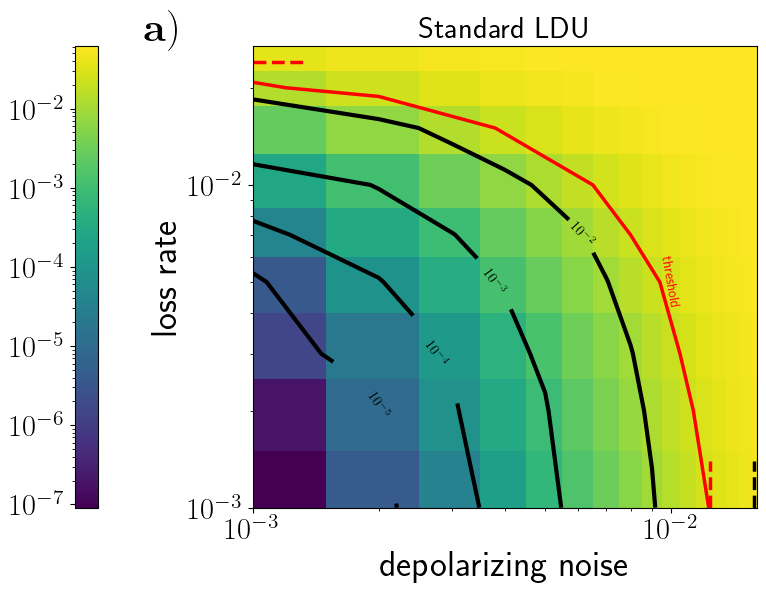

In [7]:
#Color map of the logical error rate for finite depolarizing noise and atom loss probabilities in Log-Log scale

#threshold line

threshold_depo=[0.0123,0.0113,0.0105,0.0094,0.008,0.0065,0.0038,0.002,0.0012,0.001]
threshold_loss=[0.001,0.002,0.003,0.005,0.007,0.01,0.015,0.0188,0.02,0.0208]
# Create a grid of x and y values

L = 11#distance of the code
depo_max=0.016 #maximal depolarizing noise plotted
loss_rate = [0.001,0.002,0.003,0.005,0.007,0.01,0.015,0.02,0.025] #list of loss probabilities
log_errors_all= []
depo_all = []
depo_all = []

loss_rate_all = []
std_err_all = []
for loss in loss_rate:
    log_errors=[]
    with open('data/logical_error/logical_error_X_basis_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    depo2=[]
    num_shots_list=[]
    
    for p in depo:
        if p<=depo_max:
            depo2.append(p)
            log_errors.append(data_saved[p]['error_rate'])
            num_shots_list.append(data_saved[p]['num_shots'])

    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    std_err_all.append(std_err)
    depo_all.append(depo2)
    log_errors_all.append(errors_per_round)
    loss_rate_all.append([loss]*len(depo2))

#color bar limits
min_error = min([error for log_errors in log_errors_all for error in log_errors if error != 0])
max_error = 0.062289058609503845

#color bar scale
cmap = plt.get_cmap('viridis')
norm = LogNorm(vmin=min_error, vmax=max_error)

# Create the main plot
fig, ax_main = plt.subplots(figsize=(10, 6))
pcm = ax_main.pcolormesh(depo_all, loss_rate_all, log_errors_all, shading='auto', cmap=cmap, norm=norm)
cbar = fig.colorbar(pcm, ax=ax_main, location='left', pad=0.2)

# Define contour levels
contour_levels = [1e-5, 1e-4, 1e-3, 1e-2]
contour_levels_text = [r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$']
fmt = {level: txt for level, txt in zip(contour_levels, contour_levels_text)}
contours = ax_main.contour(depo_all, loss_rate_all, log_errors_all, levels=contour_levels, colors='k', linewidths=3)

# Add labels to the contours with proper formatting
ax_main.clabel(contours, inline=True, fontsize=10, fmt=fmt)

# Plot threshold
ax_main.plot(threshold_depo, threshold_loss, '-', color='red')
ax_main.text(0.0095, 0.006, r'threshold', color='r', fontsize=10,rotation=-80, rotation_mode='anchor')
ax_main.axhline(y=0.024,xmin=-0,xmax=0.1,linestyle='--',color='red')
ax_main.axvline(x=0.0158,ymin=-0,ymax=0.1,linestyle='--',color='black')
ax_main.axvline(x=0.0124,ymin=-0,ymax=0.1,linestyle='--',color='red')

plt.xscale('log')
plt.yscale('log')

plt.ylim([1e-3,2.7e-2])
plt.xlim([1e-3,1.6e-2])
ax_main.set_xlabel(r'depolarizing noise')
ax_main.set_ylabel(r'loss rate')
ax_main.set_title('Standard LDU')
ax_main.text(0.00055,0.028,r'${\bf a)}$',fontsize=30)
plt.show()